## <font color=#F8F8FF> Light x Painel Solar
---
A Principal Teste sobre este desafio será Analisar a conta de luz de minha casa para ver se ocorreu redução por conta da implementação de luz solar.
A luz solar foi posta em dez 2023




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('./dados/gastos_luz.csv', sep=';')

In [7]:
df.head(5)

,Data,Valor
0,01/01/2022,"1.558,16"
1,01/02/2022,"2.278,44"
2,01/03/2022,"2.541,48"
3,01/04/2022,"2.410,81"
4,01/05/2022,"1.455,10"


In [8]:
df.info() #Terei que passar as datas para datetime e tambem os valores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     45 non-null     object
 1    Valor   45 non-null     object
dtypes: object(2)
memory usage: 848.0+ bytes


In [9]:
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     45 non-null     datetime64[ns]
 1    Valor   45 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 848.0+ bytes


In [11]:
print(df.columns)

Index(['Data', ' Valor '], dtype='object')


In [12]:
df.columns = df.columns.str.strip() #Retirando o espaço na coluna Valor 

In [13]:
print(df.columns)

Index(['Data', 'Valor'], dtype='object')


In [14]:
df['Valor'] = (
    df['Valor']
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

In [15]:
df.info() #Agora temos os dados da forma perfeita

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    45 non-null     datetime64[ns]
 1   Valor   45 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 848.0 bytes


In [16]:
df.head(5)

,Data,Valor
0,2022-01-01,1558.16
1,2022-02-01,2278.44
2,2022-03-01,2541.48
3,2022-04-01,2410.81
4,2022-05-01,1455.10


## <font color=#F8F8FF> Primeira ideia
---
Quero primeiramente realizar um grafico dos anos desde 2022 - 2025




In [17]:
# Criando um df com os dados desejados
df_luz_anos = df.copy()
df_luz_anos = df_luz_anos[["Data", "Valor"]]

# Gerando uma coluna que represente apenas os anos puxando-os da coluna data pedido
df_luz_anos["ano"] = df_luz_anos.Data.dt.year
df_luz_anos.drop(labels = "Data", axis = 1, inplace=True)

# Agrupando os dados por ano
df_luz_anos = df_luz_anos.groupby(["ano"]).aggregate("sum")

df_luz_anos

,Valor
ano,
2022,17068.64
2023,7274.81
2024,8890.15
2025,10703.90


## <font color=#F8F8FF> Vamos Plotar
---





### Paleta de cores

|Azul|||||
|------|------|------|------|------|
| AZUL1 |AZUL2 |AZUL3 |AZUL4 |AZUL5 |
|#03045e | #0077b6 | #00b4d8| #90e0ef | #CDDBF3 |
|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AZUL1.png?raw=true)|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AZUL2.png?raw=true)|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AZUL3.png?raw=true)|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AZUL4.png?raw=true)|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AZUL5.png?raw=true)|

&nbsp;

|Cinza|||||
|------|------|------|------|------|
| CINZA1 |CINZA2 |CINZA3 |CINZA4 |CINZA5|
|#212529 | #495057| #adb5bd | #dee2e6| #f8f9fa |
| ![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/CINZA1.png?raw=true)  |![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/CINZA2.png?raw=true) |![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/CINZA3.png?raw=true) |![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/CINZA4.png?raw=true) |![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/CINZA5.png?raw=true)|
&nbsp;

|Misto|||||
|------|------|------|------|------|
| VERMELHO1 |LARANJA1 |AMARELO1 | VERDE1 |VERDE2 |
|#e76f51 | #f4a261 | #e9c46a |#0C8040 | #4c956c |#2a9d8f|
| ![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/VERMELHO1.png?raw=true) |![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/LARANJA1.png?raw=true)|![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/AMARELO1.png?raw=true)| ![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/VERDE1.png?raw=true) | ![adicionar desc](https://github.com/alura-cursos/dataviz-graficos/blob/master/imagens/VERDE2.png?raw=true) |


In [18]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 ,BRANCO= '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa', '#FFFFFF'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [19]:
df_luz_anos_plt = df_luz_anos.copy()
df_luz_anos_plt

,Valor
ano,
2022,17068.64
2023,7274.81
2024,8890.15
2025,10703.90


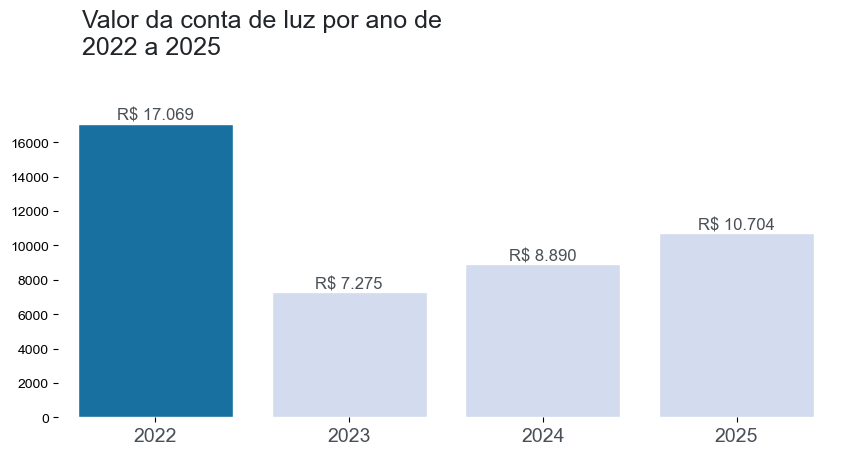

In [20]:
## Gerando a função para criar o gráfico de colunas

def grafico_gastos(cores_max=AZUL2, cores_outros=AZUL5):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Criar coluna auxiliar para definir cores
    df = df_luz_anos_plt.copy()
    df['cor'] = df['Valor'].apply(lambda x: 'max' if x == df['Valor'].max() else 'outros')
    paleta = {'max': cores_max, 'outros': cores_outros}

    # Área do gráfico e tema
    fig, ax = plt.subplots(figsize=(10,4))
    sns.set_theme(style="white")

    # Gráfico de colunas usando hue
    ax = sns.barplot(
        data=df,
        x='ano',
        y='Valor',
        hue='cor',
        palette=paleta,
        dodge=False,
        legend=False
    )

    # Personalizando o gráfico
    ax.set_title(
        "Valor da conta de luz por ano de\n2022 a 2025",
        loc="left",
        fontsize=18,
        color=CINZA1,
        pad=40,x=0.03
    )
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2)
    sns.despine(left=True, bottom=True)

    # Valores acima das barras
    offset = 500  # Ajuste do deslocamento
    for i, valor in enumerate(df["Valor"]):
        qtd = f'R$ {valor:,.0f}'.replace(",", ".")
        ax.text(i, valor + offset, qtd, color=CINZA2, fontsize=12, ha="center", va="center")

    return ax

# Chamando a função
ax = grafico_gastos()

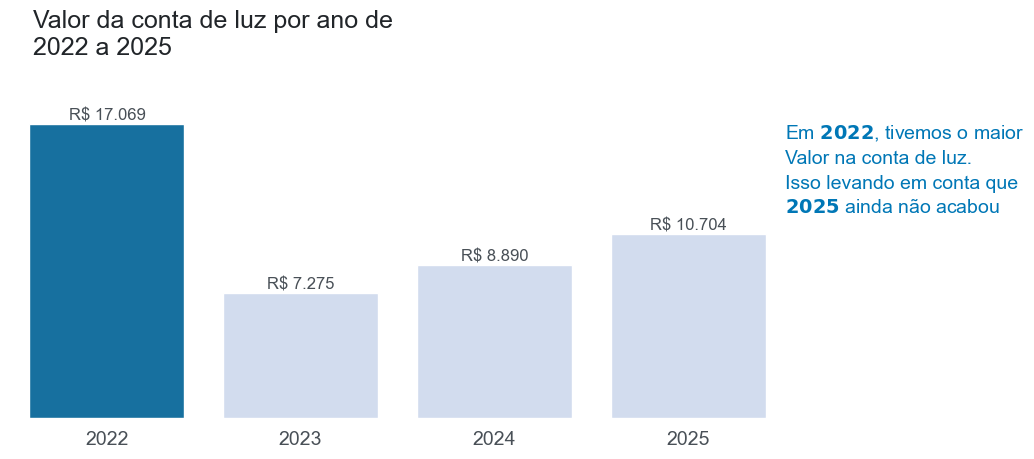

In [21]:
# Chamando a função com a lógica de cores
ax = grafico_gastos(cores_max=AZUL2, cores_outros=AZUL5)
ax.set_yticklabels([])
# Anotando uma conclusão no gráfico
ax.text(3.5, df_luz_anos_plt['Valor'].max()*0.7,
        'Em $\\bf{2022}$, tivemos o maior\n'
        'Valor na conta de luz.\n'
        'Isso levando em conta que \n' 
        '$\\bf{2025}$ ainda não acabou',
        fontsize=14, linespacing=1.45, color=AZUL2)
fig = ax.get_figure()


In [22]:
df_luz_anos_casc = df_luz_anos_plt.copy()
# Criando coluna de variação (diferença entre os anos)
df_luz_anos_casc["Variação"] = df_luz_anos_casc["Valor"].diff().fillna(df_luz_anos_casc["Valor"])
# Criando coluna "Medidas"
df_luz_anos_casc["Medidas"] = ["absolute"] + ["relative"] * (len(df_luz_anos_casc) - 1)
# Resetando o índice e renomeando a coluna
df_luz_anos_casc = df_luz_anos_casc.reset_index().rename(columns={'index': 'Ano'})

# Criando colunas de texto formatado em reais (estilo brasileiro)
df_luz_anos_casc["Valor (texto)"] = df_luz_anos_casc["Valor"].map('R$ {:,.2f}'.format)
df_luz_anos_casc["Variação (texto)"] = df_luz_anos_casc["Variação"].map('R$ {:,.2f}'.format)

# Ajustando para formato brasileiro (ponto → milhar, vírgula → decimal)
df_luz_anos_casc["Valor (texto)"] = df_luz_anos_casc["Valor (texto)"].str.replace(",", "X").str.replace(".", ",").str.replace("X", ".")
df_luz_anos_casc["Variação (texto)"] = df_luz_anos_casc["Variação (texto)"].str.replace(",", "X").str.replace(".", ",").str.replace("X", ".")

# Visualizando o resultado
df_luz_anos_casc



# Visualizando o resultado
df_luz_anos_casc.head()

,ano,Valor,Variação,Medidas,Valor (texto),Variação (texto)
0,2022,17068.64,17068.64,absolute,"R$ 17.068,64","R$ 17.068,64"
1,2023,7274.81,-9793.83,relative,"R$ 7.274,81","R$ -9.793,83"
2,2024,8890.15,1615.34,relative,"R$ 8.890,15","R$ 1.615,34"
3,2025,10703.90,1813.75,relative,"R$ 10.703,90","R$ 1.813,75"


In [23]:
# Calculando o total real (soma dos valores e soma das variações)
total_valor = df_luz_anos_casc["Valor"].sum()
total_variacao = df_luz_anos_casc["Variação"].sum()

# Formatando o total para texto no estilo brasileiro
total_valor_texto = f'R$ {total_valor:,.2f}'.replace(",", "X").replace(".", ",").replace("X", ".")
total_variacao_texto = f'R$ {total_variacao:,.2f}'.replace(",", "X").replace(".", ",").replace("X", ".")

# Criando a linha 'Total'
total = pd.Series({
    'ano': 'Total',
    'Valor': total_valor,
    'Variação': total_variacao,
    'Medidas': 'total',
    'Valor (texto)': total_valor_texto,
    'Variação (texto)': total_variacao_texto
}).to_frame().T

# Concatenando com o DataFrame original
df_luz_anos_casc = pd.concat([df_luz_anos_casc, total], ignore_index=True)

df_luz_anos_casc

,ano,Valor,Variação,Medidas,Valor (texto),Variação (texto)
0,2022,17068.64,17068.64,absolute,"R$ 17.068,64","R$ 17.068,64"
1,2023,7274.81,-9793.83,relative,"R$ 7.274,81","R$ -9.793,83"
2,2024,8890.15,1615.34,relative,"R$ 8.890,15","R$ 1.615,34"
3,2025,10703.9,1813.75,relative,"R$ 10.703,90","R$ 1.813,75"
4,Total,43937.5,10703.9,total,"R$ 43.937,50","R$ 10.703,90"


In [24]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import plotly.graph_objects as go

# Gerando o gráfico de cascata
fig = go.Figure( go.Waterfall(name = "", orientation = "v", measure = df_luz_anos_casc["Medidas"],
                             x = df_luz_anos_casc["ano"],  y = df_luz_anos_casc["Variação"],
                             text = df_luz_anos_casc["Variação (texto)"], textposition = "outside",
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             decreasing_marker = dict(color = VERMELHO1)
                             )
              )

# Personalizando o gráfico
fig.update_layout(width=1000, height=500, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Variação da Conta de luz nos ultimos 4 anos' +
                             '<br><sup size=1 style="color:#555655">2022 ' +
                              'até 2025</sup>',
                  title_pad_l = 50, plot_bgcolor= BRANCO, yaxis_range=[0, 20000], hovermode="closest")

# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

# Mostrando apenas os anos no eixo x (sem rótulos intermediários)
fig.update_xaxes(
    tickvals=df_luz_anos_casc["ano"],
    ticktext=df_luz_anos_casc["ano"]
)

# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.add_annotation(text='Fonte dos dados: Contas da light',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.2, showarrow=False)

fig.show()

In [25]:
df_luz_anos_casc

,ano,Valor,Variação,Medidas,Valor (texto),Variação (texto)
0,2022,17068.64,17068.64,absolute,"R$ 17.068,64","R$ 17.068,64"
1,2023,7274.81,-9793.83,relative,"R$ 7.274,81","R$ -9.793,83"
2,2024,8890.15,1615.34,relative,"R$ 8.890,15","R$ 1.615,34"
3,2025,10703.9,1813.75,relative,"R$ 10.703,90","R$ 1.813,75"
4,Total,43937.5,10703.9,total,"R$ 43.937,50","R$ 10.703,90"


In [26]:
## Configurando o gráfico com parâmetros que potencializam a visualização dos dados

# Importando as bibliotecas
import plotly.graph_objects as go
import numpy as np

# --- Correção fundamental ---
df_luz_anos_casc.loc[df_luz_anos_casc["ano"] == "Total", "Variação"] = \
    df_luz_anos_casc.loc[df_luz_anos_casc["ano"] == "Total", "Valor"]

# Gerando o gráfico de cascata
fig = go.Figure(
                go.Waterfall(name = "", orientation = "v", measure = df_luz_anos_casc["Medidas"],
                             y = df_luz_anos_casc["Variação"], text = df_luz_anos_casc["Valor (texto)"],
                             textposition = "outside",
                             connector_line = dict(color = CINZA3),
                             totals_marker = dict(color = AZUL3),
                             increasing_marker = dict(color = VERDE1),
                             decreasing_marker = dict(color = VERMELHO1)
                             )
                )

# Personalizando o gráfico
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Valor da conta de Luz' +
                             '<br><sup size=1 style="color:#555655">De 2022 a 2025 </sup>',
                  plot_bgcolor= BRANCO, yaxis_range=[0,48000])

# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

# Ajustando o eixo x para receber o Total
fig.update_xaxes(tickmode='array', tickvals=np.arange(0,12), ticktext=df_luz_anos_casc["ano"])

# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.add_annotation(text="Em <b>2023</b> o valor apresentou recuo <br> Isso porque neste periodo não tivemos <br> bandeiras <b>Vermelhas</b> ou <b>Taxas</b> ",
                   align="left", axref = 'x', ayref='y', x=1, y=10000, ax=3, ay=20100,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3,
                   bordercolor= CINZA3, borderwidth=1, borderpad=4)


fig.show()

Este aumento pode ter sido causado pelas bandeiras da light?
---
A **bandeira tarifária**, que indica o **custo da geração de energia**, foi **alterada pela Agência Nacional de Energia Elétrica (ANEEL)** em **2025** nos seguintes meses, tornando a **conta de luz mais cara**:

## Bandeira Tarifária — `2022`
- **Janeiro a Abril:** Bandeira Escassez Hídrica (adicional de R$ 14,20 a cada 100 kWh consumidos)  
- **Maio a Dezembro:** Bandeira Verde (sem cobrança extra)


## Bandeira Tarifária — `2023`

Em **2023**, a bandeira tarifária para a **Light** (e para todo o país) permaneceu na **cor verde** durante **todos os meses**, o que significa que **não houve cobrança extra** na conta de luz por condições desfavoráveis de geração de energia.

No entanto, é importante notar que a **Light** teve um **reajuste tarifário anual** aprovado pela **ANEEL** em **março de 2023**, que entrou em vigor no dia **15** daquele mês.  
Esse reajuste **não está diretamente relacionado** à bandeira tarifária, que é determinada **mensalmente** com base nas **condições do sistema de energia elétrica** como um todo.

A mudança nas bandeiras — como a alteração para a **bandeira amarela** ou **vermelha** — ocorreu em **outros anos**, como **2024** e **2025**, devido a **diferentes condições hidrológicas** e de **custo de geração de energia**.


## Bandeira Tarifária — `2024`
- **Janeiro a Julho:** Bandeira Verde  
- **Agosto:** Bandeira Verde  
- **Setembro:** Bandeira Vermelha Patamar 1  
- **Outubro:** Bandeira Vermelha Patamar 2  
- **Novembro e Dezembro:** Bandeira Verde


## Bandeira Tarifária — `2025`

- **Maio:** Passou de verde para amarela.  
- **Junho:** Aumentou para vermelha, **patamar 1**.  
- **Agosto:** Chegou ao patamar mais alto, **vermelha 2**.  
- **Setembro:** Permaneceu em **vermelha 2**.  
- **Outubro:** Houve uma redução para **vermelha, patamar 1**.  



In [27]:
df_mes_valor = df.copy()
df_mes_valor.head(5)

,Data,Valor
0,2022-01-01,1558.16
1,2022-02-01,2278.44
2,2022-03-01,2541.48
3,2022-04-01,2410.81
4,2022-05-01,1455.10


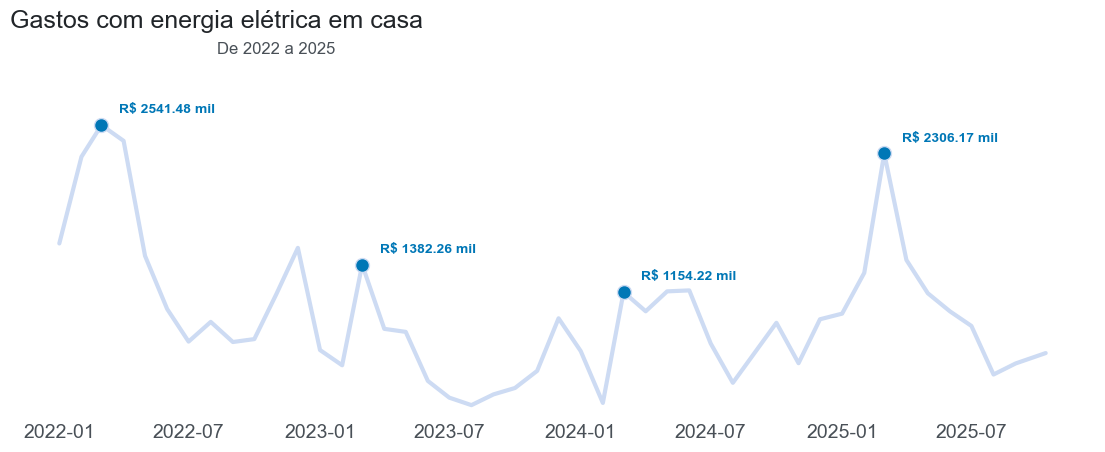

In [28]:

def grafico_luz_lw():
  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(14,4))

  # Gráfico de linha
  mes_alvo = 3 #Aqui passamos o mes alvo
  pontos_a_marcar = [True if mes == mes_alvo else False for mes in df_mes_valor["Data"].dt.month] #Desta forma Vamos estrair o mes da coluna desejada , com esta forma podemos só alterar o numero
  ax.plot(df_mes_valor["Data"],df_mes_valor["Valor"],lw=3,color=AZUL5,marker="o",markersize=10,markerfacecolor=AZUL2,markevery=pontos_a_marcar)

                                           

  # ## Personalizando o gráfico
  ax.set_title('Gastos com energia elétrica em casa', fontsize = 18, color = CINZA1, loc='left',pad=60)
  ax.text(0.3,1.2, "De 2022 a 2025", transform=ax.transAxes, color= CINZA2, fontsize=12, ha='right', va='center')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.set_frame_on(False)
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2)

     # Remover todos os ticks do eixo x e y
  ax.tick_params(axis='both', which='both', length=0)

    # Destacando e anotando os valores para o mês de março (mes_alvo = 3)
  for i in range(len(df_mes_valor["Valor"])):
        if df_mes_valor["Data"].iloc[i].month == mes_alvo:  # Verifica se o mês é março
            # A posição do eixo X será baseada diretamente na data
            x_pos = df_mes_valor["Data"].iloc[i]
            x_pos = x_pos + pd.Timedelta(days=25) 
            y_pos = df_mes_valor["Valor"].iloc[i] + 100  # Posicionando o texto um pouco acima do valor
            valor_texto = f"R$ {df_mes_valor['Valor'].iloc[i]} mil"  # Formatação do valor
            ax.text(x=x_pos, y=y_pos, s=valor_texto, color=AZUL2, weight="bold", fontsize=10)


  return ax

ax = grafico_luz_lw()

Vamos agora realizar uma previsões 
---


In [78]:
df_meses_prev = df_mes_valor.copy()

In [79]:
df_meses_prev.head()

,Data,Valor
0,2022-01-01,1558.16
1,2022-02-01,2278.44
2,2022-03-01,2541.48
3,2022-04-01,2410.81
4,2022-05-01,1455.10


In [80]:
df_meses_prev = df_meses_prev.set_index('Data')
df_meses_prev = df_meses_prev.sort_index()

In [82]:
df_resampled = df_meses_prev.resample('MS').mean()

In [ ]:
df_resampled.tail(46) # Descobrimos que Temos um mes faltando na base de dados 2024-09-01	NaN

,Valor
Data,
2022-01-01,1558.16
2022-02-01,2278.44
2022-03-01,2541.48
2022-04-01,2410.81
2022-05-01,1455.10
2022-06-01,1013.27
2022-07-01,742.55
2022-08-01,906.23
2022-09-01,739.06


In [116]:
df_clean = df_resampled.interpolate(method='time')

Após usar df_resampled.interpolate(method='time'), o valor ausente (NaN) em 2024-09-01 será preenchido com uma interpolação linear, levando em consideração o valor entre as observações de 2024-08-01 e 2024-10-01

In [117]:
print("--- Dados Limpos e Reamostrados ---")
print(df_clean.head())
print("\nVerificando o mês que faltava (índice 32):")
# O mês '2024-09-01' agora existe e tem um valor interpolado.
print(df_clean.iloc[31:34])

--- Dados Limpos e Reamostrados ---
              Valor
Data               
2022-01-01  1558.16
2022-02-01  2278.44
2022-03-01  2541.48
2022-04-01  2410.81
2022-05-01  1455.10

Verificando o mês que faltava (índice 32):
                 Valor
Data                  
2024-08-01  399.920000
2024-09-01  653.418689
2024-10-01  898.740000


In [118]:
# 5. Criar a base de modelagem
df_model = df_clean.copy()

# Feature 1: Tendência (Time Step)
# O seu 'Meses'. É a forma mais simples de capturar a tendência.
# Usar np.arange é um pouco mais limpo que o cálculo manual.
df_model['time_step'] = np.arange(len(df_model.index))

# Feature 2: Sazonalidade (Mês)
# A mais importante. Diz ao modelo que 'Janeiro' é sempre '1'.
df_model['mes'] = df_model.index.month

In [119]:
df_model.head(10)

,Valor,time_step,mes
Data,,,
2022-01-01,1558.16,0,1
2022-02-01,2278.44,1,2
2022-03-01,2541.48,2,3
2022-04-01,2410.81,3,4
2022-05-01,1455.10,4,5
2022-06-01,1013.27,5,6
2022-07-01,742.55,6,7
2022-08-01,906.23,7,8
2022-09-01,739.06,8,9


In [120]:
# Feature 3: Sazonalidade (Ano)
# Captura tendências de longo prazo.
df_model['ano'] = df_model.index.year

# Feature 4: Autocorrelação (Lags)
# O valor de hoje é provavelmente parecido com o de ontem.
# 'shift(1)' usa o valor do mês anterior.
df_model['valor_lag_1'] = df_model['Valor'].shift(1)

# Ao criar lags, a primeira linha se torna NaN. Vamos removê-la.
df_model = df_model.dropna()

print("--- DataFrame com Engenharia de Atributos ---")
print(df_model.head(5))

--- DataFrame com Engenharia de Atributos ---
              Valor  time_step  mes   ano  valor_lag_1
Data                                                  
2022-02-01  2278.44          1    2  2022      1558.16
2022-03-01  2541.48          2    3  2022      2278.44
2022-04-01  2410.81          3    4  2022      2541.48
2022-05-01  1455.10          4    5  2022      2410.81
2022-06-01  1013.27          5    6  2022      1455.10


In [121]:
df_model.head(5)

,Valor,time_step,mes,ano,valor_lag_1
Data,,,,,
2022-02-01,2278.44,1,2,2022,1558.16
2022-03-01,2541.48,2,3,2022,2278.44
2022-04-01,2410.81,3,4,2022,2541.48
2022-05-01,1455.10,4,5,2022,2410.81
2022-06-01,1013.27,5,6,2022,1455.10


In [125]:
# 6. Definir Features (X) e Alvo (y)
features = ['time_step', 'mes', 'ano', 'valor_lag_1']
target = 'Valor'

X = df_model[features]
y = df_model[target]

# 7. Dividir os dados
# Usaremos 80% para treino e 20% para teste.
# SHUFFLE=FALSE é obrigatório para séries temporais, garantindo que os dados de treino sempre sejam do "passado" e os de teste do "futuro".
#Iremos printar apenas para testes para saber as divisões
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(f"Tamanho do Treino: {len(X_train)} amostras (passado)")
print(f"Tamanho do Teste:  {len(X_test)} amostras (futuro)")


Tamanho do Treino: 36 amostras (passado)
Tamanho do Teste:  9 amostras (futuro)


In [127]:
# 8. Treinar o modelo
#Agora, vamos treinar o modelo apenas nos dados de treino e ver o quão bem ele se sai nos dados de teste (que ele nunca viu).
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

# 9. Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# 10. Avaliar o modelo
# RMSE (Root Mean Squared Error) nos diz o erro médio em 'Reais'.
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\n--- Avaliação do Modelo (RMSE): {rmse:.2f} ---")
print("Isso significa que as previsões do modelo no teste erraram, em média, R$ 223.51.")


--- Avaliação do Modelo (RMSE): 481.70 ---
Isso significa que as previsões do modelo no teste erraram, em média, R$ 223.51.


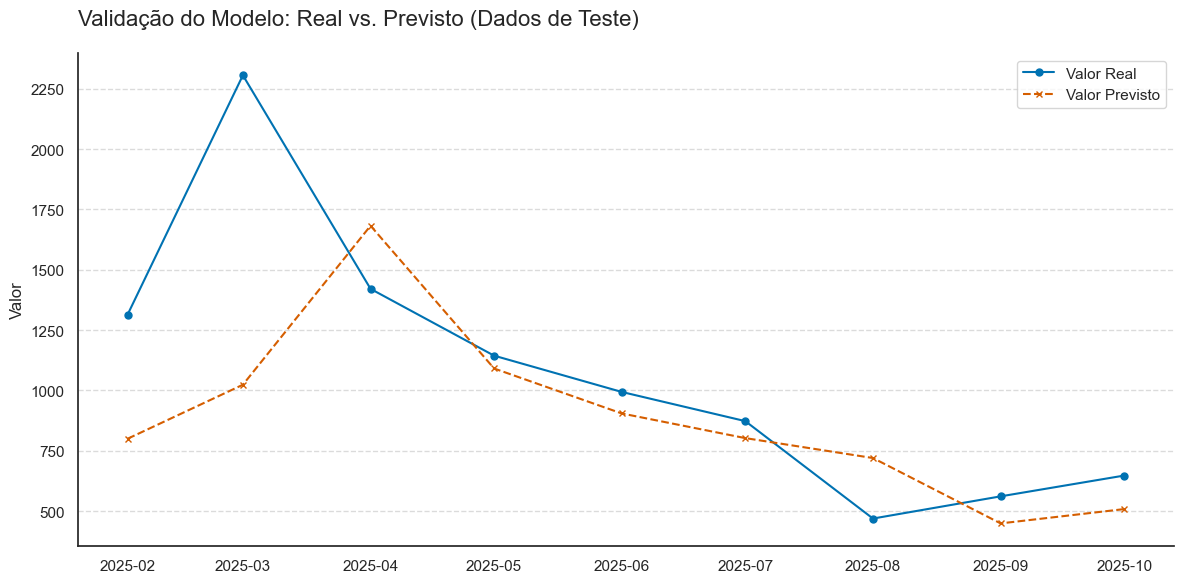

In [128]:
# 11. Criar DataFrame de resultados para plotagem
df_results = pd.DataFrame({
    'Data': X_test.index,
    'Valor Real': y_test,
    'Valor Previsto': y_pred
}).set_index('Data')

# 12. Plotar a validação (Knaflic)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_results['Valor Real'], label='Valor Real', color='#0072B2', marker='o', markersize=5)
ax.plot(df_results['Valor Previsto'], label='Valor Previsto', color='#D55E00', linestyle='--', marker='x', markersize=5)

ax.set_title('Validação do Modelo: Real vs. Previsto (Dados de Teste)', loc='left', fontsize=16, pad=20)
ax.set_ylabel('Valor')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('validacao_modelo.png')

In [129]:
# 13. Treinar o modelo FINAL com TODOS os dados
model_final = LinearRegression()
model_final.fit(X, y) # X e y completos

# 14. Preparar o loop de previsão
n_forecast = 12 # Vamos prever os próximos 12 meses
future_predictions = []
last_date = df_model.index[-1]
last_known_data = df_model.iloc[-1].copy()

# 15. Loop autoregressivo (McKinney avançado)
for i in range(n_forecast):
    # 1. Preparar as features do próximo mês
    next_date = last_date + pd.DateOffset(months=1)
    next_time_step = last_known_data['time_step'] + 1
    next_mes = next_date.month
    next_ano = next_date.year
    # O 'lag' é o valor do passo anterior
    next_lag_1 = last_known_data['Valor'] 
    
    # Criar o array de features para prever
    X_future = np.array([[
        next_time_step,
        next_mes,
        next_ano,
        next_lag_1
    ]])
    
    # 2. Fazer a previsão
    next_pred = model_final.predict(X_future)[0]
    
    # 3. Salvar a previsão
    future_predictions.append((next_date, next_pred))
    
    # 4. Atualizar o 'last_known_data' para a próxima iteração
    # O valor previsto se torna o 'lag' do próximo loop
    last_known_data['Valor'] = next_pred # CRUCIAL
    last_known_data['time_step'] = next_time_step
    last_date = next_date

# 16. Criar o DataFrame de previsões
df_forecast = pd.DataFrame(future_predictions, columns=['Data', 'Valor'])
df_forecast = df_forecast.set_index('Data')

print("\n--- Previsões Futuras ---")
print(df_forecast)


--- Previsões Futuras ---
                 Valor
Data                  
2025-11-01  628.435536
2025-12-01  604.077676
2026-01-01  683.960751
2026-02-01  724.423955
2026-03-01  738.979204
2026-04-01  736.506943
2026-05-01  722.843677
2026-06-01  701.825338
2026-07-01  675.973017
2026-08-01  646.943653
2026-09-01  615.826240
2026-10-01  583.336495


c:\Users\oneplayer\miniconda3\envs\testes\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\oneplayer\miniconda3\envs\testes\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\oneplayer\miniconda3\envs\testes\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\oneplayer\miniconda3\envs\testes\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\oneplayer\miniconda3\envs\testes\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

c:\Users\onepla

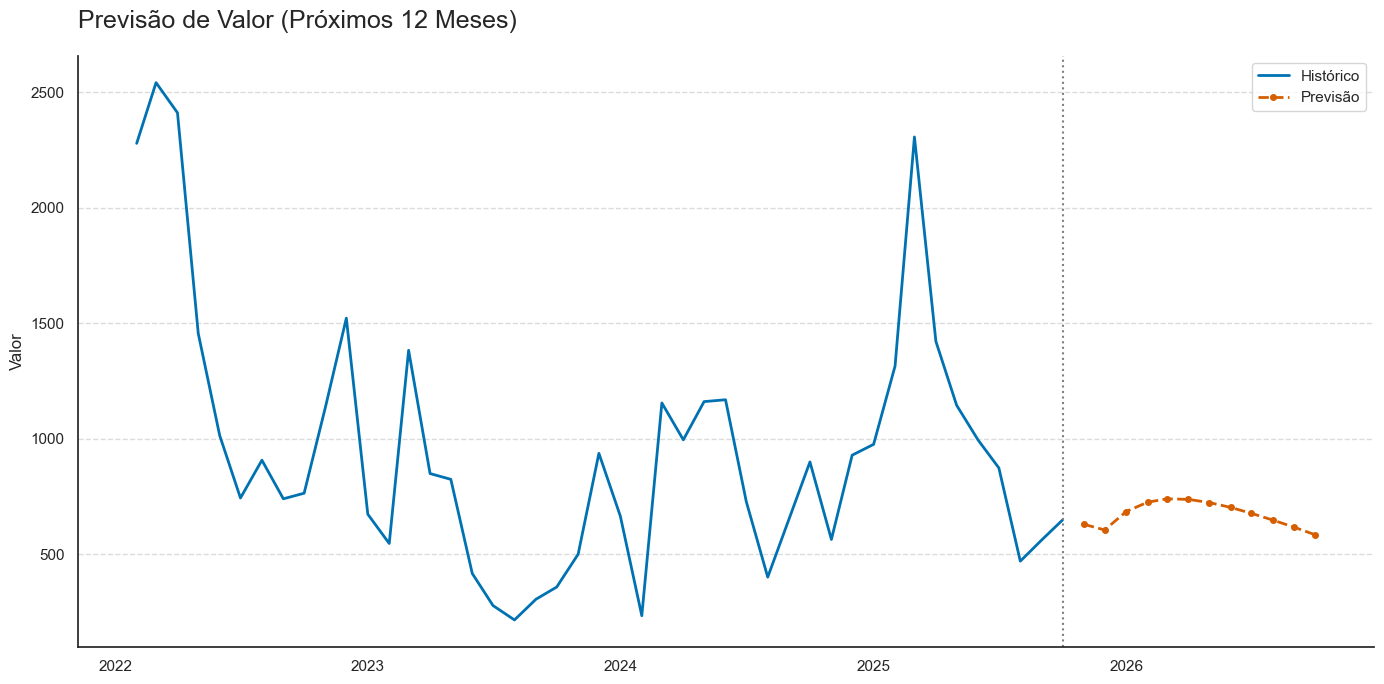

In [130]:
# 17. Preparar dados para o gráfico final
df_model['Tipo'] = 'Histórico'
df_forecast['Tipo'] = 'Previsão'

df_grafico_final = pd.concat([df_model, df_forecast])

# 18. Plotar o gráfico final (Knaflic)
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(
    df_grafico_final[df_grafico_final['Tipo'] == 'Histórico'].index,
    df_grafico_final[df_grafico_final['Tipo'] == 'Histórico']['Valor'],
    label='Histórico', 
    color='#0072B2',
    linewidth=2
)
ax.plot(
    df_grafico_final[df_grafico_final['Tipo'] == 'Previsão'].index,
    df_grafico_final[df_grafico_final['Tipo'] == 'Previsão']['Valor'],
    label='Previsão', 
    color='#D55E00', 
    linestyle='--',
    linewidth=2,
    marker='o',
    markersize=4
)

# Adicionar uma linha vertical para separar o histórico da previsão
ax.axvline(df_model.index[-1], color='gray', linestyle=':', linewidth=1.5)

ax.set_title('Previsão de Valor (Próximos 12 Meses)', loc='left', fontsize=18, pad=20)
ax.set_ylabel('Valor')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('previsao_final.png')